In [6]:
import zipfile
import os
# https://github.com/city292/build_assessment/archive/refs/heads/master.zip

In [7]:
!wget --no-check-certificate \
    "https://github.com/city292/build_assessment/archive/refs/heads/master.zip" \
    -O "/tmp/building-data.zip"


zip_ref = zipfile.ZipFile('/tmp/building-data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2023-04-25 06:15:54--  https://github.com/city292/build_assessment/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/city292/build_assessment/zip/refs/heads/master [following]
--2023-04-25 06:15:55--  https://codeload.github.com/city292/build_assessment/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/building-data.zip’

/tmp/building-data.     [ <=>                ] 268.30M  16.8MB/s    in 16s     

2023-04-25 06:16:11 (16.8 MB/s) - ‘/tmp/building-data.zip’ saved [281331192]



In [8]:
import pandas as pd
import numpy as np
from PIL import Image
import os
path0 = '/tmp/build_assessment-master/data/train/0'
path1 = '/tmp/build_assessment-master/data/train/1'
path2 = '/tmp/build_assessment-master/data/train/2'
path3 = '/tmp/build_assessment-master/data/train/3'
data0 = []
data1 = []
data2 = []
data3 = []

testpath0 = '/tmp/build_assessment-master/data/yushu/0'
testpath1 = '/tmp/build_assessment-master/data/yushu/1'
testpath2 = '/tmp/build_assessment-master/data/yushu/2'
testpath3 = '/tmp/build_assessment-master/data/yushu/3'
testdata0 = []
testdata1 = []
testdata2 = []
testdata3 = []

def load_data(ls, path):
  for filename in os.listdir(path):
    if filename.endswith(".tif"):
      img_path = os.path.join(path, filename)
      # img = Image.open(img_path).convert('L')
      img = Image.open(img_path)
      # print(img.size)
      img_data = np.array(img.resize((88, 88)))
      # print('hmm:' + str(img_data.shape))
      # ls.append(img_data.flatten())
      ls.append(img_data)
# df = pd.DataFrame(data)

In [9]:
load_data(data0, path0)
load_data(data1, path1)
load_data(data2, path2)
load_data(data3, path3)
load_data(testdata0, testpath0)
load_data(testdata1, testpath1)
load_data(testdata2, testpath2)
load_data(testdata3, testpath3)

In [10]:
import matplotlib.pyplot as plt

np_result = np.concatenate((data0, data1, data2, data3), axis=0)
class_list = [0 for i in range(len(data0))] + [1 for i in range(len(data1))] + [2 for i in range(len(data2))] + [3 for i in range(len(data3))]
# np_result = np_result/255.0
final_df = pd.DataFrame()
final_df['img'] = list(np_result)
final_df['class'] = class_list
final_df.value_counts('class')
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [11]:
np_test = np.concatenate((testdata0, testdata1, testdata2, testdata3), axis=0)
test_list = [0 for i in range(len(testdata0))] + [1 for i in range(len(testdata1))] + [2 for i in range(len(testdata2))] + [3 for i in range(len(testdata3))]
# np_test = np_test/255.0
test_df = pd.DataFrame()
test_df['img'] = list(np_test)
test_df['class'] = test_list
test_df.value_counts('class')
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [12]:
test_df["class"].value_counts()

3    1140
1     918
0     778
2     665
Name: class, dtype: int64

In [13]:
final_df["class"].value_counts()

1    3843
3    2436
2    2107
0    2038
Name: class, dtype: int64

In [14]:
len(test_list)

3501

In [15]:
X_test = np.array(test_df['img'].tolist())
y_test = np.array(test_df['class'].tolist())

In [16]:
print(X_test.shape)
print(y_test.shape)

(3501, 88, 88, 3)
(3501,)


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

# extract the numpy arrays from the DataFrame
X = np.array(final_df['img'].tolist())
y = np.array(final_df['class'].tolist())

# split the data into training and testing sets
X_train, X_test_1, y_train, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# convert the data to the correct format for your model
# x_train = X_train.reshape(-1, 88, 88, 1)  # assuming the images are grayscale
# x_test = X_test.reshape(-1, 88, 88, 1)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
# y_test.shape

print(X_train.shape)
print(X_test_1.shape)
print(y_train.shape)
print(y_test_1.shape)
print(X_val.shape)
print(y_val.shape)

(5836, 88, 88, 3)
(3128, 88, 88, 3)
(5836,)
(3128,)
(1460, 88, 88, 3)
(1460,)


In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [19]:
df = pd.DataFrame()
df['train'] = y_train
# df['val'] = y_val
print(df['train'].value_counts(normalize=True))
df1= pd.DataFrame()
df1['test'] = y_test_1
print(df1['test'].value_counts(normalize=True))
df2 = pd.DataFrame()
df2['val'] = y_val
df2['val'].value_counts(normalize=True)

1    0.368746
3    0.233722
2    0.202193
0    0.195339
Name: train, dtype: float64
1    0.368606
3    0.233696
2    0.202046
0    0.195652
Name: test, dtype: float64


1    0.368493
3    0.233562
2    0.202055
0    0.195890
Name: val, dtype: float64

In [55]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (88,88,3))
for layer in base_model.layers:
  layer.trainable = False

In [56]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(4, activation = 'softmax')(x)

In [57]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [50]:
history = head_model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
183/183 [==============================] - 33s 108ms/step - loss: 1.8360 - accuracy: 0.5625 - val_loss: 0.8429 - val_accuracy: 0.6192
Epoch 2/15
183/183 [==============================] - 14s 76ms/step - loss: 0.6883 - accuracy: 0.7058 - val_loss: 0.8904 - val_accuracy: 0.6034
Epoch 3/15
183/183 [==============================] - 14s 74ms/step - loss: 0.5014 - accuracy: 0.7930 - val_loss: 0.9293 - val_accuracy: 0.6240
Epoch 4/15
183/183 [==============================] - 14s 74ms/step - loss: 0.3095 - accuracy: 0.8854 - val_loss: 1.2669 - val_accuracy: 0.5705
Epoch 5/15
183/183 [==============================] - 13s 73ms/step - loss: 0.1758 - accuracy: 0.9428 - val_loss: 1.2070 - val_accuracy: 0.5966
Epoch 6/15
183/183 [==============================] - 13s 74ms/step - loss: 0.0886 - accuracy: 0.9779 - val_loss: 1.3682 - val_accuracy: 0.6062
Epoch 7/15
183/183 [==============================] - 13s 74ms/step - loss: 0.0346 - accuracy: 0.9973 - val_loss: 1.4540 - val_accuracy

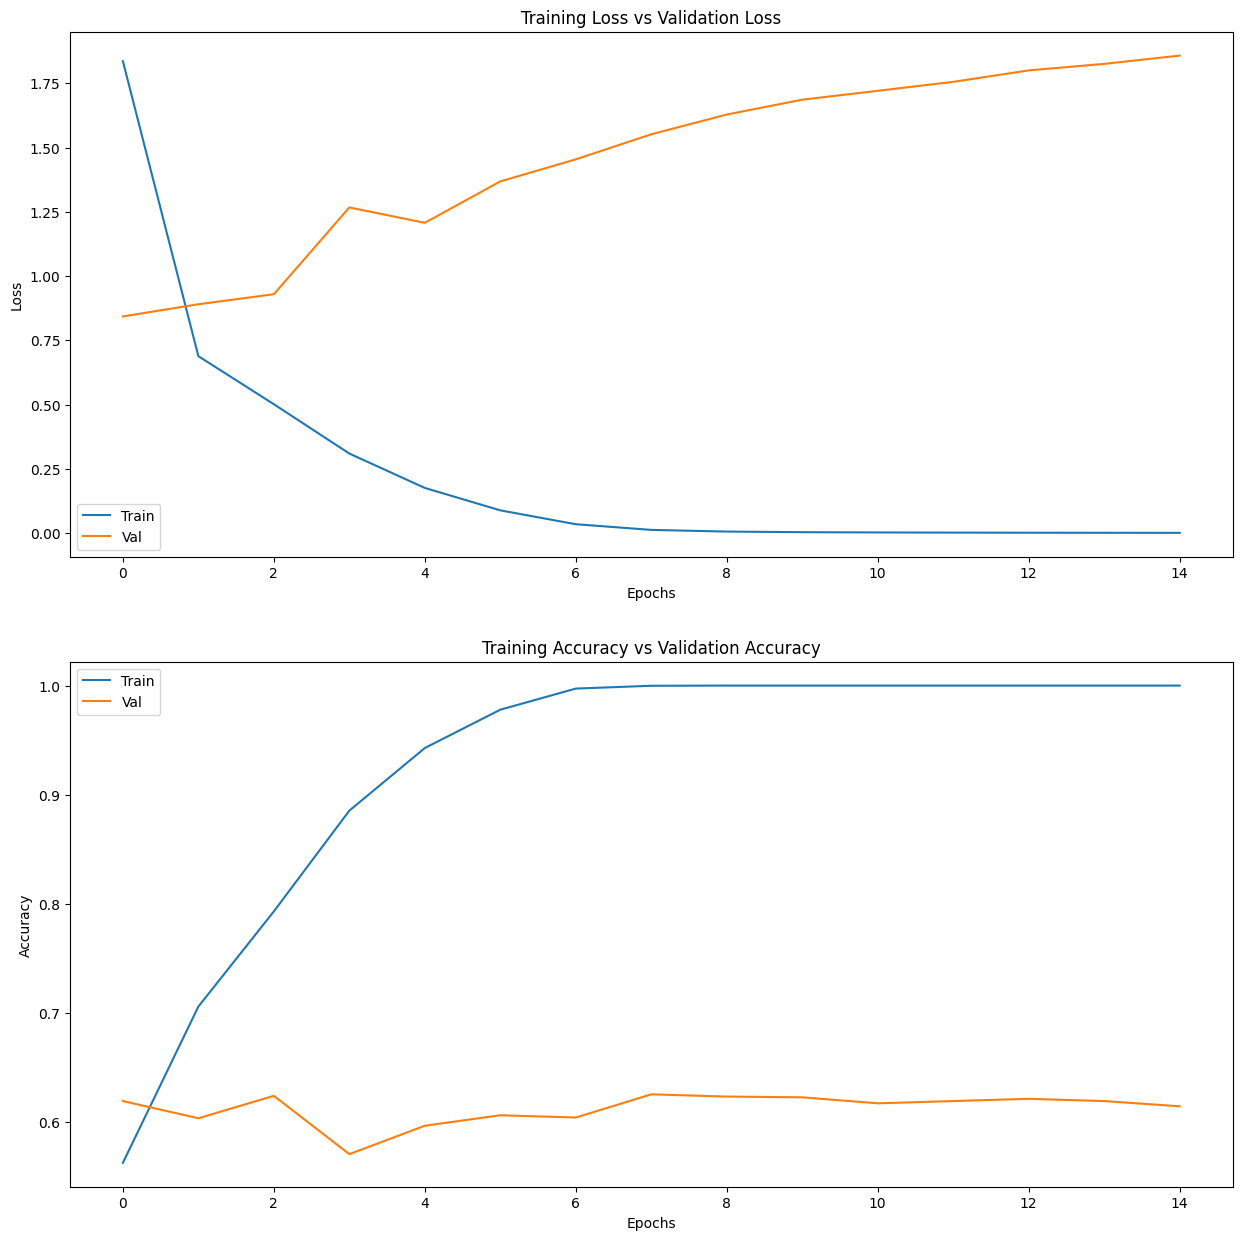

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [58]:
head_model.evaluate(X_test_1, y_test_1)


98/98 [==============================] - 11s 55ms/step - loss: 2.4394 - accuracy: 0.2222


[2.4393699169158936, 0.22218669950962067]

In [59]:
head_model.evaluate(X_test, y_test)

110/110 [==============================] - 6s 56ms/step - loss: 2.5283 - accuracy: 0.2256


[2.5283443927764893, 0.22564981877803802]

In [64]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(88, 88, 3))

# Freeze all layers except the last 5 layers
for layer in vgg.layers[:-5]:
    layer.trainable = False

# Add a Flatten layer and a Dense layer on top of the VGG16 base
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create a new model with the modified VGG16 base and the new Dense layers
model = Model(inputs=vgg.input, outputs=predictions)

# Compile the model with Adam optimizer and sparse categorical cross entropy loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
def train_model(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=10):
    # Fit the model on the training data
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    return history

history = train_model(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=10)

Epoch 1/10
183/183 [==============================] - 8s 41ms/step - loss: 1.3501 - accuracy: 0.3687 - val_loss: 1.3500 - val_accuracy: 0.3685
Epoch 2/10
183/183 [==============================] - 8s 41ms/step - loss: 1.3501 - accuracy: 0.3687 - val_loss: 1.3500 - val_accuracy: 0.3685
Epoch 3/10
183/183 [==============================] - 8s 41ms/step - loss: 1.3501 - accuracy: 0.3687 - val_loss: 1.3501 - val_accuracy: 0.3685
Epoch 4/10
183/183 [==============================] - 8s 42ms/step - loss: 1.3501 - accuracy: 0.3687 - val_loss: 1.3501 - val_accuracy: 0.3685
Epoch 5/10
183/183 [==============================] - 8s 41ms/step - loss: 1.3501 - accuracy: 0.3687 - val_loss: 1.3500 - val_accuracy: 0.3685
Epoch 6/10
183/183 [==============================] - 8s 42ms/step - loss: 1.3501 - accuracy: 0.3687 - val_loss: 1.3500 - val_accuracy: 0.3685
Epoch 7/10
183/183 [==============================] - 8s 43ms/step - loss: 1.3501 - accuracy: 0.3687 - val_loss: 1.3501 - val_accuracy: 0.3685

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [20]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(512, activation='relu')(x)

# Add a final softmax layer for classification
predictions = Dense(4, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers except for the last 5 layers
for layer in model.layers[:-5]:
    layer.trainable = False

# Compile the model with Adam optimizer and sparse categorical crossentropy loss function
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
def train_model(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=10):
    # Fit the model on the training data
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    return history
    
history = train_model(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=100)

Epoch 1/100
183/183 [==============================] - 14s 35ms/step - loss: 28.0404 - accuracy: 0.3538 - val_loss: 7.1546 - val_accuracy: 0.4486
Epoch 2/100
183/183 [==============================] - 4s 24ms/step - loss: 5.8440 - accuracy: 0.3693 - val_loss: 5.0587 - val_accuracy: 0.3500
Epoch 3/100
183/183 [==============================] - 4s 23ms/step - loss: 3.0404 - accuracy: 0.4100 - val_loss: 2.5491 - val_accuracy: 0.4096
Epoch 4/100
183/183 [==============================] - 4s 24ms/step - loss: 2.5498 - accuracy: 0.4174 - val_loss: 2.0291 - val_accuracy: 0.4452
Epoch 5/100
183/183 [==============================] - 4s 20ms/step - loss: 1.8446 - accuracy: 0.4400 - val_loss: 1.7521 - val_accuracy: 0.4137
Epoch 6/100
183/183 [==============================] - 4s 19ms/step - loss: 1.5396 - accuracy: 0.4553 - val_loss: 1.6792 - val_accuracy: 0.3747
Epoch 7/100
183/183 [==============================] - 4s 20ms/step - loss: 1.3816 - accuracy: 0.4700 - val_loss: 1.5973 - val_accurac

In [22]:
model.evaluate(X_test_1, y_test_1)

98/98 [==============================] - 4s 39ms/step - loss: 1.2537 - accuracy: 0.4600


[1.2536927461624146, 0.46003836393356323]

In [23]:
model.evaluate(X_test, y_test)

110/110 [==============================] - 2s 22ms/step - loss: 1.5651 - accuracy: 0.4876


[1.5651370286941528, 0.487574964761734]

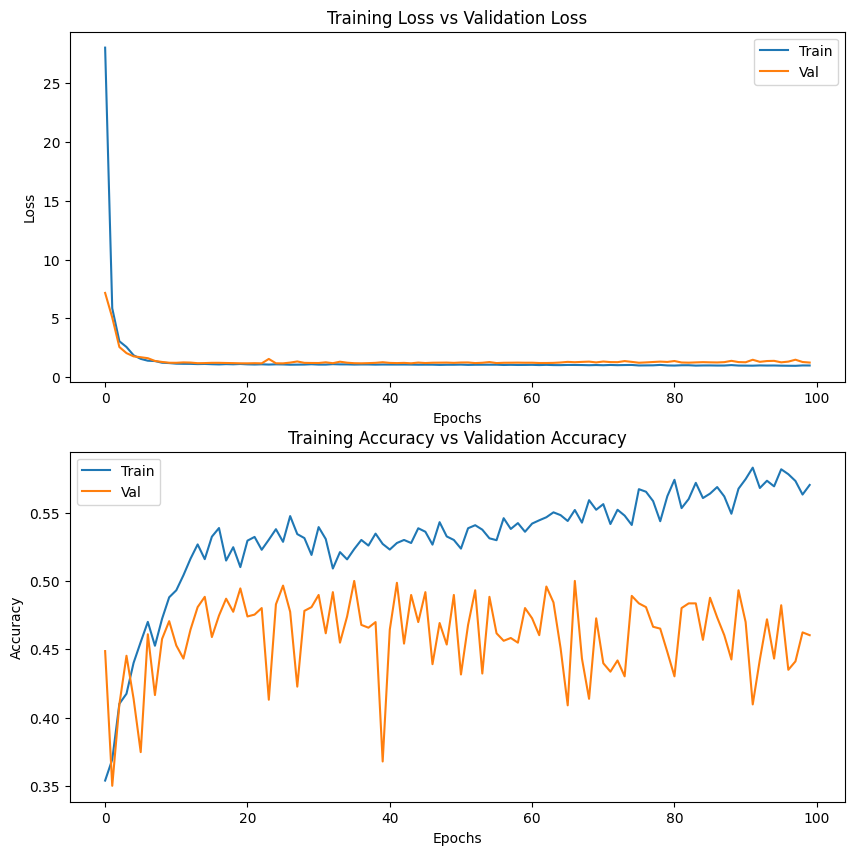

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])